In [58]:
#getting 2000 samples randomly from validation set and their corresponding bounding boxes, 
# Sorry for absolute pathes:))

import xml.etree.ElementTree as ET
import os
import glob
from random import sample
aaa = 0
bbb = 0
####################################################################################################
'''
# In this chunk of code I simply remove xml files that have more than 1 bounding boxes or bounding boxes cover
# more than 50% of image size!
# This '/home/mallet/Downloads/val/*.xml' path is 
# referring to bounding boxes for all 50k images of validation set in image net. 
# 29833 images out of this 50k has more than 1 bounding boxes or cover more than 50% of image size!

val_files = glob.glob('/home/mallet/Downloads/val/*.xml')
filcounter = 0
for file in val_files:
    root = ET.parse(file).getroot()
    bnbxcntr = 0
    imwidth = int(root[3][0].text)
    imheight = int(root[3][1].text)
    xmin = int(root[5][4][0].text)
    ymin = int(root[5][4][1].text)
    xmax = int(root[5][4][2].text)
    ymax = int(root[5][4][3].text)
    aimg = imwidth*imheight
    abb = (xmax-xmin)*(ymax-ymin)
    for bnd in root.findall('./object/bndbox'):
        bnbxcntr+=1
    if bnbxcntr>1 or (aimg<2*abb):
        os.remove(file)
        filcounter+=1
print(filcounter)

####################################################################################################

# In this chunck, I am removing those 29833 images from imageset as well,
# since I removed their BB in last section. This '/home/mallet/Desktop/VanillaVsARobust/valid/' refers
# to all 50k images of validation set that I want to remove 29833 of them. 
# And this '/home/mallet/Downloads/val/*.xml' is simply those xml files that I obtained in previous section
# after removing those 29833!

flss = os.listdir('/home/mallet/Desktop/VanillaVsARobust/valid/')
bbfiles = glob.glob('/home/mallet/Downloads/val/*.xml')
print(type(bbfiles))
for fls in flss:
    files = os.listdir('/home/mallet/Desktop/VanillaVsARobust/valid/'+fls)
    for file in files:
        d = '/home/mallet/Downloads/val/' + file.split(".")[0] + '.xml'
        if d in bbfiles:
            aaa+=1
        else:
            os.remove('/home/mallet/Desktop/VanillaVsARobust/valid/'+fls+'/'+file)
            bbb+=1
print(aaa, bbb)
####################################################################################################

# After previous 2 steps, now I have 2 set of 20167 in both Jpeg and xml. now I randomly keep 2 or 3 images
# (because some classes had 1 or some had 0 images after satisfying those two condition in first section)
# from each category/class which will result in having 2000 images and removing 18167 images.
# In order to reach to 2000 samples, I randomly sampled 2 from each class. and for those classes that had less
# than 2 samples. I kept some classes to 3 samples to make up for those. So it is like 982 class with 2 samples,
# 11 class with 3 samples and unfortunately 4 classes have no sample:(

jj=0
asa = 0
flss = os.listdir('/home/mallet/Desktop/VanillaVsARobust/valid/')
for fls in flss:
    files = os.listdir('/home/mallet/Desktop/VanillaVsARobust/valid/'+fls)
    if len(files)==3 and jj<977:
        print('2samples not possible', fls)


        for file in sample(files,1):
            #d = '/home/mallet/Downloads/val/' + file.split(".")[0] + '.xml'
            os.remove('/home/mallet/Desktop/VanillaVsARobust/valid/'+fls+'/'+file)
            os.remove('/home/mallet/Desktop/VanillaVsARobust/bb/'+file.split(".")[0] + '.xml')
            asa+=1  
            jj+=1
print(asa)
'''

'\n# In this chunk of code I simply remove xml files that have more than 1 bounding boxes or bounding boxes cover\n# more than 50% of image size!\n# This \'/home/mallet/Downloads/val/*.xml\' path is \n# referring to bounding boxes for all 50k images of validation set in image net. \n# 29833 images out of this 50k has more than 1 bounding boxes or cover more than 50% of image size!\n\nval_files = glob.glob(\'/home/mallet/Downloads/val/*.xml\')\nfilcounter = 0\nfor file in val_files:\n    root = ET.parse(file).getroot()\n    bnbxcntr = 0\n    imwidth = int(root[3][0].text)\n    imheight = int(root[3][1].text)\n    xmin = int(root[5][4][0].text)\n    ymin = int(root[5][4][1].text)\n    xmax = int(root[5][4][2].text)\n    ymax = int(root[5][4][3].text)\n    aimg = imwidth*imheight\n    abb = (xmax-xmin)*(ymax-ymin)\n    for bnd in root.findall(\'./object/bndbox\'):\n        bnbxcntr+=1\n    if bnbxcntr>1 or (aimg<2*abb):\n        os.remove(file)\n        filcounter+=1\nprint(filcounter)\n\

In [39]:
import torchvision.transforms as transforms
import torchray.benchmark
# Transforms 
val_transforms = transforms.Compose([transforms.Resize(256),transforms.CenterCrop(224), 
    transforms.ToTensor(), transforms.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225])])    

# Loading images and their labels 
vall = torchray.benchmark.datasets.ImageFolder('/home/mallet/Desktop/VanillaVsARobust/validationSample',
                                               transform = val_transforms)

##################################################################################################
# since I saved every image in their category label with the code of "n0...", when Using ImageFolder,
# They will get loaded correctly based on 0...999 category that starts with tench and ends with toilet paper!
# in below we see example of Image ILSVRC2012_val_00039476.JPEG which is a cat playing with toilet paper which
# which is in toilet paper class id 999!
# Note: have to remove normalization in val_transforms to get a clear image.

In [40]:
print(vall.get_image_url(1998))
print(vall[1998])

/home/mallet/Desktop/VanillaVsARobust/validationSample/n15075141/ILSVRC2012_val_00039476.JPEG
(tensor([[[ 0.2967,  0.3138,  0.3138,  ...,  1.1358,  1.1529,  1.1529],
         [ 0.3138,  0.2967,  0.3138,  ...,  1.2043,  1.2043,  1.1700],
         [ 0.3309,  0.3309,  0.3994,  ...,  1.1358,  1.1529,  1.1358],
         ...,
         [-0.5253, -0.4739, -0.4739,  ...,  1.2385,  1.1872,  1.1358],
         [-0.4226, -0.4226, -0.4739,  ...,  1.1872,  1.1358,  1.1015],
         [-0.5424, -0.4911, -0.5082,  ...,  1.0844,  1.0673,  1.0844]],

        [[ 0.1702,  0.1877,  0.1352,  ...,  0.9755,  0.9755,  0.9405],
         [ 0.1527,  0.1877,  0.2052,  ...,  0.8880,  0.8704,  0.8704],
         [ 0.1877,  0.2052,  0.2402,  ...,  0.8880,  0.8704,  0.8880],
         ...,
         [-0.6001, -0.6527, -0.7052,  ...,  0.8880,  0.8704,  0.8179],
         [-0.7227, -0.7402, -0.6877,  ...,  0.8179,  0.8004,  0.7654],
         [-0.6702, -0.6877, -0.6527,  ...,  0.8179,  0.8004,  0.7479]],

        [[-0.6890, -0

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


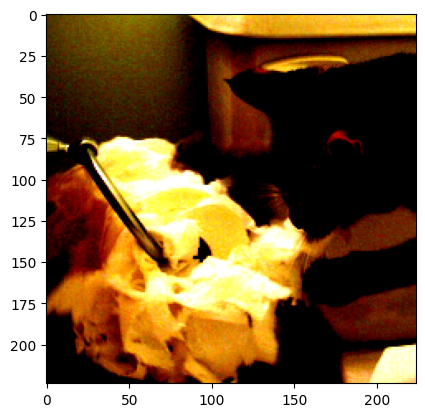

In [41]:
from matplotlib import pyplot as plt
plt.imshow(  vall[1998][0].permute(1, 2, 0)  )
plt.show()